# CNNs with Tensorflow-Keras

## CNN intro

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf

### Load and prepare the MNIST data

In [6]:
# Load the data
(X, y), (Xtest, ytest) = mnist.load_data()
print(X.shape, y.shape)

# Scale the data and divide it into training, validation and test sets
Ntrain=40000
Xtrain=X[:Ntrain]/255.
ytrain=y[:Ntrain]
Xvalid=X[Ntrain:]/255.
yvalid=y[Ntrain:]
Xtest=Xtest/255.
print(Xtest.shape)

# Reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
Xtrain=Xtrain.reshape(-1,28,28,1)
Xvalid=Xvalid.reshape(-1,28,28,1)
Xtest=Xtest.reshape(-1,28,28,1)

# One-hot encode the labels
ytrainB=keras.utils.to_categorical(ytrain)
yvalidB=keras.utils.to_categorical(yvalid)
ytestB=keras.utils.to_categorical(ytest)

(60000, 28, 28) (60000,)
(10000, 28, 28)


### Create model

In [7]:
# CNN similar to LeNet-5, using tf-keras
lenet5 = models.Sequential()
lenet5.add(layers.Conv2D(6, (5, 5), activation='relu',input_shape=(28, 28, 1), padding="same"))
lenet5.add(layers.AveragePooling2D((2, 2)))
lenet5.add(layers.Conv2D(16, (5, 5), activation='relu'))
lenet5.add(layers.AveragePooling2D((2, 2)))
lenet5.add(layers.Conv2D(120, (1, 1), activation='relu'))
lenet5.add(layers.Flatten())
lenet5.add(layers.Dense(84, activation='relu'))
lenet5.add(layers.Dense(10, activation='softmax'))

In [8]:
lenet5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 120)         2040      
                                                                 
 flatten_1 (Flatten)         (None, 3000)             

In [9]:
lenet5.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
epochs = 20
tLog = lenet5.fit(Xtrain, ytrainB, epochs=20,batch_size=1024, 
                  validation_data=(Xvalid, yvalidB))

Epoch 1/20
40/40 [==============================] - 12s 303ms/step - loss: 0.0286 - accuracy: 0.9915 - val_loss: 0.0603 - val_accuracy: 0.9825
Epoch 2/20
40/40 [==============================] - 12s 295ms/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0536 - val_accuracy: 0.9845
Epoch 3/20
40/40 [==============================] - 12s 300ms/step - loss: 0.0237 - accuracy: 0.9929 - val_loss: 0.0556 - val_accuracy: 0.9843
Epoch 4/20
40/40 [==============================] - 14s 357ms/step - loss: 0.0223 - accuracy: 0.9937 - val_loss: 0.0543 - val_accuracy: 0.9850
Epoch 5/20
40/40 [==============================] - 15s 374ms/step - loss: 0.0216 - accuracy: 0.9934 - val_loss: 0.1123 - val_accuracy: 0.9679
Epoch 6/20
40/40 [==============================] - 12s 311ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0558 - val_accuracy: 0.9852
Epoch 7/20
40/40 [==============================] - 11s 281ms/step - loss: 0.0190 - accuracy: 0.9947 - val_loss: 0.0544 - val_accuracy: 0.9844

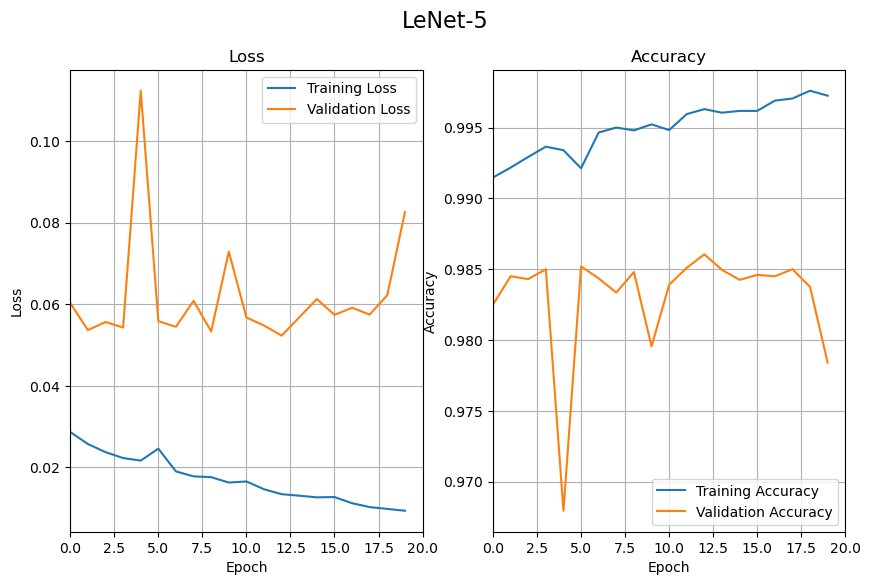

In [18]:
h=tLog.history
fig, (loss, acc) = plt.subplots(1, 2, figsize=(10, 6))

loss.plot(h['loss'], label='Training Loss')
loss.plot(h['val_loss'], label='Validation Loss')
loss.set_title('Loss')
loss.set_xlabel('Epoch')
loss.set_ylabel('Loss')
loss.legend()
loss.grid(True)
loss.set_xlim([0,epochs])
# loss.axis([0,epochs])

acc.plot(h['accuracy'], label='Training Accuracy')
acc.plot(h['val_accuracy'], label='Validation Accuracy')
acc.set_title('Accuracy')
acc.set_xlabel('Epoch')
acc.set_ylabel('Accuracy')
acc.legend()
acc.grid(True)

acc.set_xlim([0,epochs])

# acc.axis([0,epochs,0,1])

fig.suptitle('LeNet-5', fontsize=16)
plt.show()


In [40]:
print(h.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


## CNNAdvanced - Advanced Convolutional Neural Networks

#### Using Pre-trained Models from Keras

In [19]:
# from keras.applications.inception_resnet_v2 import InceptionResNetV2
# I=InceptionResNetV2(weights='imagenet')


from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from keras.preprocessing import image
import numpy as np

# Load the pre-trained InceptionResNetV2 model with imagenet weights
CNN = InceptionResNetV2(weights='imagenet')

# Load an image to classify
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)

# Preprocess the input data
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions and decode them
preds = CNN.predict(x)
print('Predicted:', decode_predictions(preds, top=5))

225209952/225209952 [==============================] - 9s 0us/step


AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

In [ ]:
from keras.applications.xception import Xception, decode_predictions, preprocess_input
from keras.preprocessing import image
import numpy as np

# Load the pre-trained Xception model with imagenet weights
CNN = Xception(weights='imagenet')

# Load an image to classify
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)

# Preprocess the input data
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions and decode them
preds = CNN.predict(x)
print('Predicted:', decode_predictions(preds, top=5))

### Transfer Learning Example

In [6]:
import tensorflow as tf
# tf.keras.utils.get_file(
#     origin="https://storage.googleapis.com/download.tensorflow.org/example images/flower photos.tgz", 
#     fname="flower photos", untar=True)

In [7]:
from keras.applications.vgg16 import VGG16
cnnBase=VGG16(weights="imagenet",
              include_top=False, 
              input_shape=(200,200,3))

In [8]:
cnnBase.trainable=False
cnnBase.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [9]:
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout, AvgPool2D
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K 
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks, optimizers, regularizers

cnn = Sequential()
cnn.add(cnnBase)
cnn.add(AvgPool2D(pool_size=(2,2),strides=2))
cnn.add(Flatten())
cnn.add(Dense(128,activation="relu"))
cnn.add(Dropout(.4))
cnn.add(Dense(5, activation="softmax"))


### TRAINING THE NETWORK

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

dbDir="./tf_flowers/"
dataGen=ImageDataGenerator(preprocessing_function=preprocess_input)

trainGen=dataGen.flow_from_directory(directory=dbDir+"train/",
                                    target_size=(200,200),
                                    class_mode="categorical",
                                    batch_size=32)

validGen=dataGen.flow_from_directory(directory=dbDir+"validation/",
                                    target_size=(200,200),
                                    class_mode="categorical",
                                    batch_size=32)

testGen=dataGen.flow_from_directory(directory=dbDir+"test/",
                                    target_size=(200,200),
                                    class_mode="categorical",
                                    batch_size=32)

cnn.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=["accuracy"])

# tLog = cnn.fit_generator(trainGen, epochs=20, validation_data=validGen)

Found 1835 images belonging to 5 classes.
Found 735 images belonging to 5 classes.
Found 1100 images belonging to 5 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 200, 200, 3) (32, 5)
(200, 200, 3)


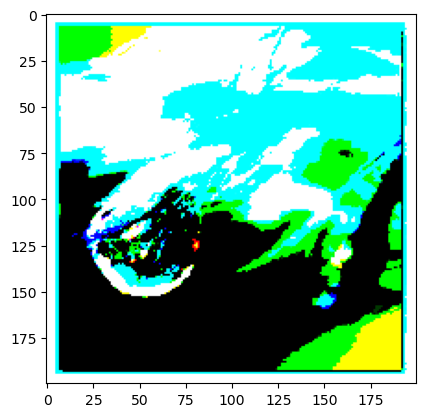

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(200, 200, 3) (32, 5)
0.5923961 -0.4850196


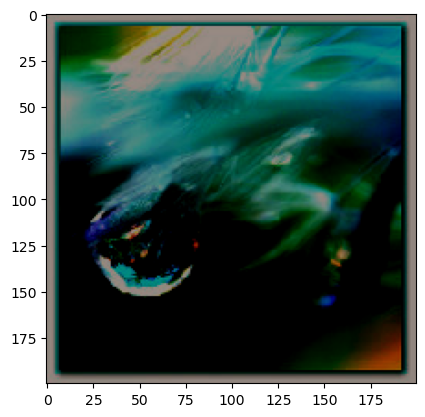

In [24]:
import matplotlib.pyplot as plt

I, y = trainGen.next()
print(I.shape, y.shape)

A = I[0]
print(A.shape)
plt.imshow(A)
plt.show()

B = A/255.
print(B.shape, y.shape)
print(B.max(), B.min())

plt.imshow(B)
plt.show()


In [17]:
print("trainGen.class_indices:", trainGen.class_indices)
print("trainGen.classes:", trainGen.classes)
print("trainGen.filenames:", trainGen.filenames)
print("trainGen.image_shape:", trainGen.image_shape)
print("trainGen.n:", trainGen.n)
print("trainGen.num_classes:", trainGen.num_classes)
print("trainGen.samples:", trainGen.samples)
print("trainGen.target_size:", trainGen.target_size)
print("trainGen.batch_size:", trainGen.batch_size)
print("trainGen.directory:", trainGen.directory)
print("trainGen.save_to_dir:", trainGen.save_to_dir)
print("trainGen.color_mode:", trainGen.color_mode)
print("trainGen.data_format:", trainGen.data_format)
print("trainGen.dtype:", trainGen.dtype)
print("trainGen.interpolation:", trainGen.interpolation)


trainGen.class_indices: {'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
trainGen.classes: [0 0 0 ... 4 4 4]
trainGen.filenames: ['daisy\\10172379554_b296050f82_n.jpg', 'daisy\\10172567486_2748826a8b.jpg', 'daisy\\102841525_bd6628ae3c.jpg', 'daisy\\1031799732_e7f4008c03.jpg', 'daisy\\10391248763_1d16681106_n.jpg', 'daisy\\10437754174_22ec990b77_m.jpg', 'daisy\\10437929963_bc13eebe0c.jpg', 'daisy\\10466558316_a7198b87e2.jpg', 'daisy\\10555815624_dc211569b0.jpg', 'daisy\\10555826524_423eb8bf71_n.jpg', 'daisy\\10559679065_50d2b16f6d.jpg', 'daisy\\10712722853_5632165b04.jpg', 'daisy\\10841136265_af473efc60.jpg', 'daisy\\10993710036_2033222c91.jpg', 'daisy\\10993818044_4c19b86c82.jpg', 'daisy\\10994032453_ac7f8d9e2e.jpg', 'daisy\\11023272144_fce94401f2_m.jpg', 'daisy\\11124324295_503f3a0804.jpg', 'daisy\\1140299375_3aa7024466.jpg', 'daisy\\11439894966_dca877f0cd.jpg', 'daisy\\11642632_1e7627a2cc.jpg', 'daisy\\11834945233_a53b7a92ac_m.jpg', 'daisy\\11870378973_2ec1919f1

In [11]:
# Choose an optimization method
opt = optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)

# Compile the model
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
# tLog = cnn.fit_generator(trainGen, epochs=20, validation_data=validGen)
cnn.fit(trainGen, steps_per_epoch=20, 
        validation_data=validGen,
        validation_steps=10, epochs=10)

Epoch 1/10
20/20 [==============================] - 164s 8s/step - loss: 1.1209 - accuracy: 0.7690 - val_loss: 0.7151 - val_accuracy: 0.7781
Epoch 2/10
20/20 [==============================] - 161s 8s/step - loss: 0.6649 - accuracy: 0.8281 - val_loss: 0.7791 - val_accuracy: 0.7750
Epoch 3/10
20/20 [==============================] - 161s 8s/step - loss: 0.5121 - accuracy: 0.8687 - val_loss: 0.6248 - val_accuracy: 0.8281
Epoch 4/10
20/20 [==============================] - 164s 8s/step - loss: 0.4573 - accuracy: 0.8422 - val_loss: 0.5695 - val_accuracy: 0.8375
Epoch 5/10
20/20 [==============================] - 158s 8s/step - loss: 0.4325 - accuracy: 0.8875 - val_loss: 0.6516 - val_accuracy: 0.8062
Epoch 6/10
20/20 [==============================] - 182s 9s/step - loss: 0.3576 - accuracy: 0.9016 - val_loss: 0.7473 - val_accuracy: 0.8219
Epoch 7/10
20/20 [==============================] - 142s 7s/step - loss: 0.3868 - accuracy: 0.8828 - val_loss: 0.6599 - val_accuracy: 0.8250
Epoch 8/10
20

### Data Augmentation

In [11]:

ImgGen = ImageDataGenerator(rotation_range=30,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode="nearest")

ImgGen

In [ ]:
from keras.preprocessing import image

# Select an image
# fN="daisy/1150395827 6f94a5c6e4 n.jpg"
fN = "tf_flowers/test/daisy/5547758_eea9edfd54_n.jpg"

# Import and convert to numpy array
I=image.load_img(fN, target_size=(200,200))
I=image.img_to_array(I)

# Add extra dim
I=I[np.newaxis,:,:,:]


for A in ImgGen.flow(I, batch_size=1):
    A=A.squeeze() #remove extra dim
    plt.imshow(np.uint8(A))

#### PREPARING THE DATA

In [12]:

dbDir="./tf_flowers/"
dataGen1=ImageDataGenerator(preprocessing_function=preprocess_input,
                            rotation_range=30,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,   
                            fill_mode="nearest")

dataGen2=ImageDataGenerator(preprocessing_function=preprocess_input)

trainGen=dataGen1.flow_from_directory(directory=dbDir+"train/",
                                    target_size=(200,200),
                                    class_mode="categorical",
                                    batch_size=32)

validGen=dataGen2.flow_from_directory(directory=dbDir+"validation/",
                                    target_size=(200,200),
                                    class_mode="categorical",
                                    batch_size=32)

testGen=dataGen2.flow_from_directory(directory=dbDir+"test/",
                                    target_size=(200,200),
                                    class_mode="categorical",
                                    batch_size=32)


Found 1835 images belonging to 5 classes.
Found 735 images belonging to 5 classes.
Found 1100 images belonging to 5 classes.


In [13]:

from keras.applications.vgg16 import VGG16
cnnBaseNew=VGG16(weights="imagenet",
                 include_top=False, 
                 input_shape=(200,200,3))

cnnNew=Sequential()
cnnNew.add(cnnBaseNew)
cnnNew.add(AvgPool2D(pool_size=(2,2),strides=2))
cnnNew.add(Flatten())
cnnNew.add(Dense(128,activation="relu"))
cnnNew.add(Dropout(.4))
cnnNew.add(Dense(5, activation="softmax"))

opt = optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
cnnNew.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])


In [14]:
cnnNew.fit(trainGen,steps_per_epoch=20, 
           validation_data=validGen,
           validation_steps=10,epochs=2)

Epoch 1/2
20/20 [==============================] - 503s 25s/step - loss: 3.3883 - accuracy: 0.2047 - val_loss: 1.7450 - val_accuracy: 0.1813
Epoch 2/2
20/20 [==============================] - 368s 18s/step - loss: 1.6371 - accuracy: 0.2278 - val_loss: 1.6000 - val_accuracy: 0.2406


In [ ]:
# evaluate
cnnNew.evaluate(testGen)

# save model
# cnnNew.save("cnnNew.h5")

- or re-use the previously trained one

In [ ]:
opt = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
cnn.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
cnn.fit(trainGen,steps_per_epoch=20, 
        validation_data=validGen, 
        validation_steps=10,
        epochs=10)

In [ ]:
cnnBase.summary()

### Transfer Learning Example - Fine Tuning

In [ ]:
# 1. Choose a pre-trained network for the convolutional base, and freeze its weights.
# 2. Add a custom MLP network to the top of the convolutional base.
# 3. Train the MLP network.
# 4. Unfreeze some top layer in the convolutional base.
# 5. Jointly train these layers with the MLP network.

In [ ]:
layerList=["block5 conv1","block5 conv2","block5 conv3"]
for layer in cnnBase.layers:
    for layerName in layerList:
        if layer.name == layerName:
            layer.trainable=True

In [ ]:
cnn.fit(trainGen,steps_per_epoch=20,
        validation_data=validGen,
        validation_steps=10,epochs=10)


In [ ]:
cnn.evaluate(testGen)

## Visualizing What Convolutional Neural Networks Have Learned
- VISUALIZING CNNS INTERMEDIATE LAYERS:
This gives us an idea how the network transforms an image
- VISUALIZING THE CONVOLUTIONAL FILTERS:
This shows which pattern or concept each filter responds to.
- VISUALIZING HEATMAPS OF CLASS ACTIVATIONS:
This shows which part of the image is responsible for the class output

In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', 
                                      split=split, 
                                      as_supervised=True)

i = 0
fig, ax = plt.subplots(1, 8)
for image, label in testDataset.take(8):
    ax[i].axis('off')
    ax[i].set_title(classNames[label])
    ax[i].imshow(image)
    i += 1

plt.show()

ModuleNotFoundError: No module named 'tensorflow_datasets'

##### Visualizing Feature Maps

In [ ]:
from tensorflow.keras.models import load_model
cnn=load_model("XceptionCatsDogs.h5")
print(cnn.summary())

In [ ]:
from tensorflow.keras import models
lout=[l.output for l in cnn.layers]
actcnn=models.Model(inputs=cnn.input, outputs=lout)

activ=actcnn.predict(I)
A=activ[12] #128 feature maps of 55x55

##### Visualizing CNN Filters

In [ ]:
# Initializations and Model Setup
from tensorflow.keras.models import load_model
cnn=load_model("XceptionCatsDogs.h5")


from tensorflow.keras import models
layer_name='block2_sepconv1'
layer = cnn.get_layer(name=layer_name)
cnnNew = keras.Model(inputs=cnn.inputs, outputs=layer.output)

In [ ]:
import tensorflow.random as rd
imgWidth=200
imgHeight=200
# Gaussian distribution
I= rd.normal((1, imgWidth, imgHeight, 3),stddev=0.5)
# or
# Uniform distribution
I= rd.uniform((1, imgWidth, imgHeight, 3),maxval=0.5,minval=-0.5)

# or
# Random integers
# I= rd.uniform((1, imgWidth, imgHeight, 3),maxval=255,minval=0,dtype="int32")

In [ ]:

@tf.function
def gradient_ascent(img, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        gain = compute_gain(img, filter_index)
    # Compute gradients.
    grads = tape.gradient(gain, img)
    # Normalize gradients.
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return img, gain


def compute_gain(input_image, filter_index):
    activation = cnnNew(input_image)
    # Take out border pixels.
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.math.reduce_mean(filter_activation)

